<a href="https://colab.research.google.com/github/aswnnnth/ML-project/blob/main/cognorise_ml_task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
!pip install nltk
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [55]:
df=pd.read_csv('/content/archive (3).zip')
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [56]:
df.shape

(5572, 2)

In [57]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [58]:
df.tail()

,Category,Message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [59]:
df.dtypes

,0
Category,object
Message,object


In [60]:
df['Category'].unique()

array(['ham', 'spam'], dtype=object)

<Axes: xlabel='count', ylabel='Category'>

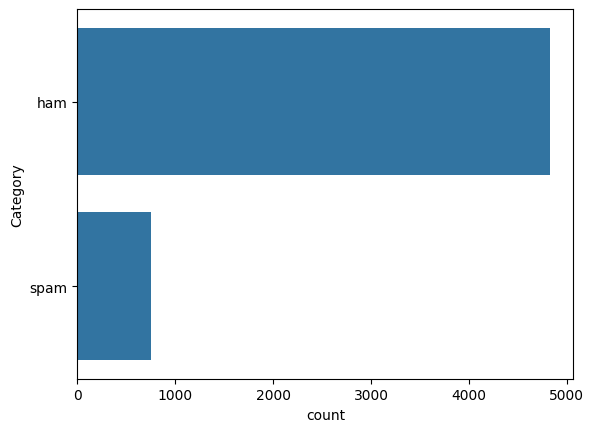

In [61]:
sns.countplot(df['Category'])

In [62]:
df['Category']=df['Category'].map({'ham':0,'spam':1})
df

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [63]:
df.columns

Index(['Category', 'Message'], dtype='object')

In [64]:
df.isna().sum()

,0
Category,0
Message,0


In [65]:
df.dtypes

,0
Category,int64
Message,object


In [66]:
email=df['Message']
email

,Message
0,"Go until jurong point, crazy.. Available only ..."
1,Ok lar... Joking wif u oni...
2,Free entry in 2 a wkly comp to win FA Cup fina...
3,U dun say so early hor... U c already then say...
4,"Nah I don't think he goes to usf, he lives aro..."
...,...
5567,This is the 2nd time we have tried 2 contact u...
5568,Will ü b going to esplanade fr home?
5569,"Pity, * was in mood for that. So...any other s..."
5570,The guy did some bitching but I acted like i'd...


**Tokenization**

In [67]:
email=email.str.replace('[^a-zA-Z0-9]+',' ')
email

,Message
0,"Go until jurong point, crazy.. Available only ..."
1,Ok lar... Joking wif u oni...
2,Free entry in 2 a wkly comp to win FA Cup fina...
3,U dun say so early hor... U c already then say...
4,"Nah I don't think he goes to usf, he lives aro..."
...,...
5567,This is the 2nd time we have tried 2 contact u...
5568,Will ü b going to esplanade fr home?
5569,"Pity, * was in mood for that. So...any other s..."
5570,The guy did some bitching but I acted like i'd...


In [68]:
from nltk import word_tokenize
email=email.apply(lambda x:' '.join([w for w in word_tokenize(x) if len(w)>=3]))
email

,Message
0,until jurong point crazy Available only bugis ...
1,lar ... Joking wif oni ...
2,Free entry wkly comp win Cup final tkts 21st M...
3,dun say early hor ... already then say ...
4,Nah n't think goes usf lives around here though
...,...
5567,This the 2nd time have tried contact have won ...
5568,Will going esplanade home
5569,Pity was mood for that ... any other suggestions
5570,The guy did some bitching but acted like inter...


**Stemming**

In [69]:
from nltk.stem import SnowballStemmer
st=SnowballStemmer('english')
email=email.apply(lambda x:' '.join([st.stem(w.lower()) for w in word_tokenize(x)]))
email

,Message
0,until jurong point crazi avail onli bugi great...
1,lar ... joke wif oni ...
2,free entri wkli comp win cup final tkts 21st m...
3,dun say earli hor ... alreadi then say ...
4,nah n't think goe usf live around here though
...,...
5567,this the 2nd time have tri contact have won th...
5568,will go esplanad home
5569,piti was mood for that ... ani other suggest
5570,the guy did some bitch but act like interest b...


**Remove stopwords**

In [70]:
from nltk.corpus import stopwords
sw=stopwords.words('english')
email=email.apply(lambda x:' '.join([w for w in word_tokenize(x) if w not in sw]))
email

,Message
0,jurong point crazi avail onli bugi great world...
1,lar ... joke wif oni ...
2,free entri wkli comp win cup final tkts 21st m...
3,dun say earli hor ... alreadi say ...
4,nah n't think goe usf live around though
...,...
5567,2nd time tri contact £750 pound prize claim ea...
5568,go esplanad home
5569,piti mood ... ani suggest
5570,guy bitch act like interest buy someth els nex...


In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer()
data=vec.fit_transform(email)
data.shape

(5572, 7231)

In [73]:
y=df['Category']
y

,Category
0,0
1,0
2,1
3,0
4,0
...,...
5567,1
5568,0
5569,0
5570,0


In [74]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data,y,test_size=0.30,random_state=42)
x_train

<3900x7231 sparse matrix of type '<class 'numpy.float64'>'
	with 31610 stored elements in Compressed Sparse Row format>

In [75]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
knn=KNeighborsClassifier(n_neighbors=7)
lr=LogisticRegression(solver='saga',max_iter=100)
rf=RandomForestClassifier(n_estimators=100,random_state=42)
ab=AdaBoostClassifier(n_estimators=50,random_state=42)
lst=[knn,lr,rf,ab]

In [77]:
for i in lst:
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  print('Model is',i)
  print(accuracy_score(y_test,y_pred))
  print(confusion_matrix(y_test,y_pred))
  print(classification_report(y_test,y_pred))
  print('='*100)

Model is KNeighborsClassifier(n_neighbors=7)
0.8881578947368421
[[1448    0]
 [ 187   37]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      1448
           1       1.00      0.17      0.28       224

    accuracy                           0.89      1672
   macro avg       0.94      0.58      0.61      1672
weighted avg       0.90      0.89      0.85      1672

Model is LogisticRegression(solver='saga')
0.9551435406698564
[[1447    1]
 [  74  150]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1448
           1       0.99      0.67      0.80       224

    accuracy                           0.96      1672
   macro avg       0.97      0.83      0.89      1672
weighted avg       0.96      0.96      0.95      1672

Model is RandomForestClassifier(random_state=42)
0.9766746411483254
[[1448    0]
 [  39  185]]
              precision    recall  f1-score   support

           0    